# TEWA TUTORIAL

# **Signal Detection Experiment Simulation   + Analysis**

The goal of this tutorial, is to:

1.  simulate an experiment, based on the theoretical d-prime measures of signal detection theory.

2.  Calcualte the behavioral responses in this experiment

3. Calculate the empirical d' and criterion from the simulated measures 


# Import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Set simulation main parameters

In [49]:
signal_mean = 4
noise_mean = 0  # do not change this
sd = 2  # the assumption of SDT is that noise and signal have equal Standard Deviation,
crit = 2  # decision criteria, above which response is signal present

# Calculate and plot *theoretical* SDT predicitons

change the parameters above and see how this plot changes 

stat.norm.pdf :  normal probability density function

Text(0.5, 1.0, 'd-prime: 2.00')

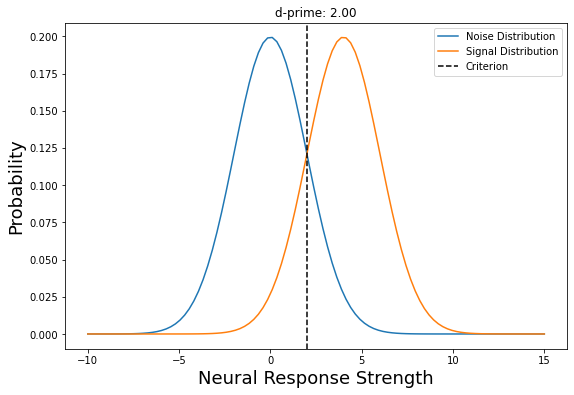

In [57]:
d_prime_theory = (signal_mean - noise_mean) / sd

x = np.linspace(-10, 15, 100)  #  X stimulus strength
noise = stats.norm.pdf(x, loc = noise_mean, scale = sd) #YOUR CODE
signal = stats.norm.pdf(x, loc = signal_mean, scale = sd)
plt.figure(figsize = (9, 6))
plt.plot(x, noise, label = 'Noise Distribution')
plt.plot(x, signal, label = 'Signal Distribution')
plt.xlabel('Neural Response Strength', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)

plt.axvline(crit ,color='k', label = "Criterion", linestyle = "--")  # fill out for vertical criterion line

plt.legend()
plt.title(f"d-prime: {d_prime_theory:,.2f}")

### Set up experiment 

0 - noise trial
1 - signal trial 

half of trials is signal, but in random order

In [95]:
n_trial = 1000  # num of signal trials + num of noise trials 

stimuli = np.random.binomial(1, 0.5, size = n_trial)

### Simulate assumed response variable in the participants brain

using the same paramters, as defined above

In [106]:
def get_neural_response(stimuli, noise_mean, signal_mean, sd):
    neural_response = np.random.normal(noise_mean, sd) if stimuli == 0 else np.random.normal(signal_mean, sd)
    return neural_response

neural_response = [get_neural_response(stimuli, noise_mean, signal_mean, sd) for stimuli in stimuli]

print(neural_response[0:50])

[-2.069312764924229, -2.1133387921290114, 4.159068562764018, 4.165733434367873, -2.8030293993803497, 2.6597467478275996, 3.3394484963928353, 1.9046254801777067, -2.521837079197768, -1.799654287593614, 1.1698136308500824, -0.9896584132685526, 0.2536846497128422, 2.9980545512549406, 3.3898618175624766, 1.9104215036562373, 2.5622442117381823, 2.0221743261532064, -1.25701049235206, 0.612305888355257, 3.4013773232788433, 3.1818952959392073, -2.3263734782668015, -3.0128332240297864, 2.3964878082755456, -3.3515845323747007, 0.45041948591653924, 3.217704627658984, 2.484082283289104, -3.1361518527901295, 4.851050606335884, 1.0086184093833037, -4.666445942002509, 2.793161633562571, -0.8295534793580985, -3.0223439020984553, 2.582184947864038, 2.5621750124463416, 1.6500220898548046, 0.9990546755943045, 1.922840898093685, 3.507817278989416, 2.1567174067161687, -3.6463738301068385, 6.744902720115229, 1.8572706164335364, 3.304313024884808, 0.07612625158831496, 0.9164814631443257, -2.5168015054788215]

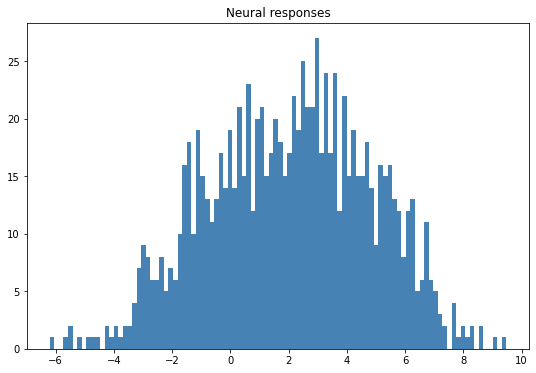

In [120]:
plt.figure(figsize = (9, 6))
plt.hist(neural_response, bins = 100, color = "steelblue")
plt.title("Neural responses");

### simualte/calculate behavioral responses, based on neural signal and criteria

0 = response is noise
1 = response is signal

In [109]:
def get_behavioral_response(stimuli, noise_mean, signal_mean, sd, crit):
    neural_response = get_neural_response(stimuli, noise_mean, signal_mean, sd)
    behavioral_response = 1 if neural_response >= crit else 0
    return behavioral_response

behavioral_response = [get_behavioral_response(stimuli, noise_mean, signal_mean, sd, crit) for stimuli in stimuli]

print(behavioral_response[0:50])

[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]


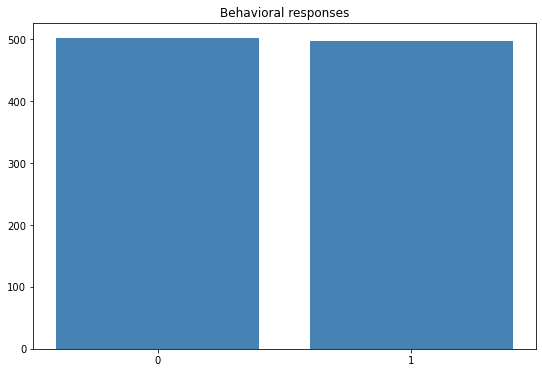

In [119]:
plt.figure(figsize = (9, 6))
plt.bar([0, 1], [np.sum(np.array(behavioral_response) == 0), np.sum(np.array(behavioral_response) == 1)], color = "steelblue")
plt.xticks([0, 1])
plt.title("Behavioral responses");

## Now the "experiment" is ready, we can start to analyze it. :-) 

based on the stimulus and response vectors,  calculate the number of:

1. misses
2. hits 
3. false alarms 
4. correct rejections


tip: use np.sum

In [148]:
experiment = np.vstack([stimuli, np.array(behavioral_response)]).T

hits = np.sum((experiment[:, 0] == 1) & (experiment[:, 1] == 1))
misses =  np.sum((experiment[:, 0] == 1) & (experiment[:, 1] == 0))
false_alarms = np.sum((experiment[:, 0] == 0) & (experiment[:, 1] == 1))
corr_rejections = np.sum((experiment[:, 0] == 0) & (experiment[:, 1] == 0))

print('Num Hits:              ', hits)
print('Misses :               ', misses)
print('Num False Alarms:      ', false_alarms)
print('Num Correct Rejection: ', corr_rejections)

Num Hits:               416
Misses :                96
Num False Alarms:       82
Num Correct Rejection:  406


Calculate the hit-rate and false alarm rate from the above

In [149]:
hit_rate = hits / (hits + misses)
false_alarm_rate = false_alarms / (false_alarms + corr_rejections)
print(f"Hit rate:         {hit_rate: ,.2%}")
print(f"False alarm rate: {false_alarm_rate: ,.2%}")

Hit rate:          81.25%
False alarm rate:  16.80%


##  Calculate Empirical Signal Detection Theory Measures
 see the meaning of inverse normal cdf here: [link text](http://gru.stanford.edu/lib/exe/fetch.php/tutorials/zof1.png)


Sensitivity
d'=  invnorm(H)-invnorm(FA)

Bias:
c= -(invnorm(H)+invnorm(FA))/2



for inverse cumulative normal we can use:

stats.norm.ppf


In [151]:
d_prime_emp = stats.norm.ppf(hit_rate) - stats.norm.ppf(false_alarm_rate)
bias = (stats.norm.ppf(hit_rate) + stats.norm.ppf(false_alarm_rate)) / 2
print(f"D-prime from data:  {d_prime_emp: ,.2f}")
print(f"Bias from data:     {bias: ,.2f}")

D-prime from data:   1.85
Bias from data:     -0.04


## Homework
Take all the necessary code from above, re-use it in the function below:
The function should take 4 input parameters:
1. MeanSignal: mean of signal distribution
2. SD (same for signal and noise)
3. Crit criterion (above which response is signal)
4. NTr : number of trials (half of which is signal, half noise)

The function should perform the simulation as above and return the  Hit Rate and False Alarm Rate

In [ ]:
def sim_exp(mean_signal, sd, crit, n_trials):
    
    
    
    return hit_rate, false_alarm_rate

 ## Homework 2.:
calling the function above, repeatedly, we can make an ROC curve (that shows the relationship of Hit rate and false alarm rate).
1. keep MeanSignal fixed and change the criterion in a for loop (for the values defined below)
2. visualize  with scatter plot: False alarm Rate on x-axis, Hit rate on y axis
3. do not forget to make the plot nice with legends, labels, fontsize, etc


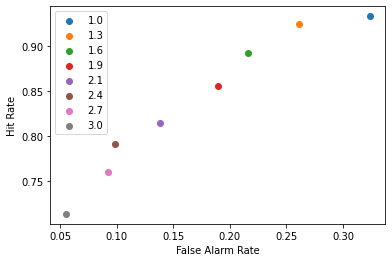

In [ ]:
Criteria=np.linspace(1,3,8)   
 # YOUR CODE
  # YOUR CODE
  # YOUR CODE
   # YOUR CODE

## Homework 3.:
similarly to the task above, but change both the criterion and the SignalMean (2 embedded for loops, to make multiple ROC curves), and make a scatter plot with the result!

use at least 8 values for criterion and 4 values for SignalMean. 
The 4 values for Signal Mean should be above 0 and below 12.


dots that have the same signal mean (but different Criteria),should show up in the same color.
dots that have different signal mean, should have different colors!    (this will make the figure readable)

do not forget to make the plot nice with legends, labels, fontsize, etc




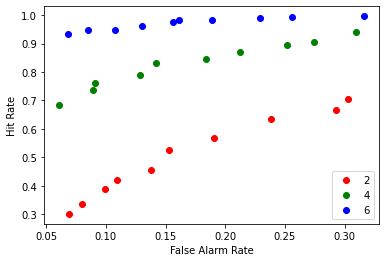

In [ ]:

 # YOUR CODE
  # YOUR CODE
  # YOUR CODE
   # YOUR CODE

   

#  Psychometric curves

Text(0, 0.5, 'p(Yes)')

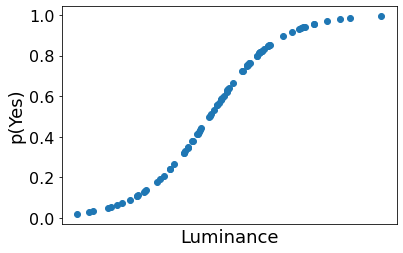

In [ ]:
Stim=np.random.normal(0,2,80)
Ans=(1/(1+np.exp(-Stim)))
plt.scatter(Stim,Ans)
plt.xticks([])
plt.yticks(fontsize=16)
plt.xlabel('Luminance',fontsize=18)
plt.ylabel('p(Yes)',fontsize=18)


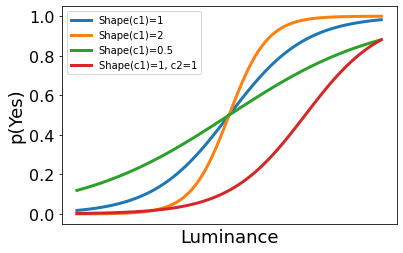

In [ ]:
def sigm_func(x,c1,c2):
    return 1/(1+np.exp(-c1*(x-c2)))


Stim=np.linspace(-4,4,80)
Ans=SigmFunc(Stim,1,0)
Ans2=SigmFunc(Stim,2,0)
Ans3=SigmFunc(Stim,.5,0)
Ans4=SigmFunc(Stim,1,2)

plt.plot(Stim,Ans,linewidth=3,label='Shape(c1)=1')
plt.plot(Stim,Ans2,linewidth=3,label='Shape(c1)=2')
plt.plot(Stim,Ans3,linewidth=3,label='Shape(c1)=0.5')
plt.plot(Stim,Ans4,linewidth=3,label='Shape(c1)=1, c2=1')

plt.xticks([])
plt.yticks(fontsize=16)
plt.xlabel('Luminance',fontsize=18)
plt.ylabel('p(Yes)',fontsize=18)
plt.legend()

# let's try to simulate an experiment based on a sigmoid curve

the idea is that we used simulate N trials fro each stimulus strength level, where the probabily of 'yes' response is determined by the sigmoid curve

Text(0, 0.5, 'p(Yes)')

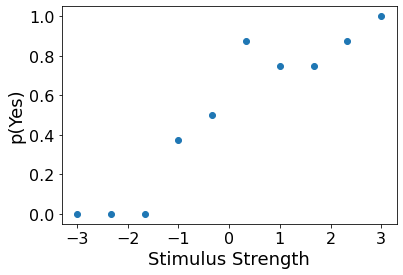

In [ ]:
Xs=np.linspace(-3,3,10)   # stimulus range of values
#SigmFunc(np.linspace(-3,3,20),1,0)
Ntr=8  # num of trials at each stimulus strength
AnsSim=np.zeros((len(Xs),Ntr))    #  array for storing responses
for cx,x in enumerate(Xs):   # loop though and count values of Xs
    ptr=SigmFunc(x,1.3,.02)  # probabilty of response 1
    for N in range(Ntr):
        RandP=np.random.rand() # random value (0-1 range)
        if RandP < ptr:   # if random number is smaller than probability, answer is 1
            AnsSim[cx,N]=1
        else:   # other wise answer is zero (in fact this part could be cut)
        AnsSim[cx,N]=0

plt.scatter(Xs,np.mean(AnsSim,1))

 # plt.plot(Xs,SigmFunc(Xs,c1,0),linewidth=3,label='Shape(c1)'+str(c1))
    
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Stimulus Strength',fontsize=18)
plt.ylabel('p(Yes)',fontsize=18)

## Trying values for Psychometric function shape parameter manually

In [ ]:
plt.figure(figsize=(12,7))
#plt.plot(Xs,np.mean(AnsSim,1))##
for cc,c1 in enumerate([0.5,1,2,3]):
    plt.subplot(2,2,cc+1)
    plt.scatter(Xs,np.mean(AnsSim,1))

    plt.plot(Xs,SigmFunc(Xs,c1,0),linewidth=3,label='Shape(c1)'+str(c1))

    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel('Stimulus Strength',fontsize=15)
    plt.ylabel('p(Yes)',fontsize=15)

    plt.title('c1='+str(c1)+' c2=0',fontsize=17)
plt.tight_layout()

## sigmoid likelihood function for answers 0 and 1

(log likelihood for computational reasons)

In [ ]:
XX=np.repeat(Xs,Ntr)   # array for X

AnsTrue=AnsSim.flatten()  # 1d array for Y

ps=SigmFunc(XX,1,0)
LL=np.sum(np.log(ps[AnsTrue==1]))+np.sum(np.log((1-ps[AnsTrue==0])))

def SigmLLfit(pars):
    ps=SigmFunc(XX,pars[0],pars[1])
    LL=np.sum(np.log(ps[AnsTrue==1]))+np.sum(np.log((1-ps[AnsTrue==0])))
    return -LL

## maximum likelihood model fitting for psychometric curve

Text(0.5, 1.0, 'c1=1.21 c2=-0.09')

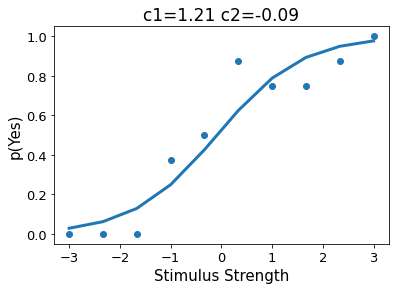

In [ ]:
from scipy.optimize import minimize
mod=minimize(SigmLLfit,x0=[.5,1])

plt.scatter(Xs,np.mean(AnsSim,1))

plt.plot(Xs,SigmFunc(Xs,mod.x[0],mod.x[1]),linewidth=3,label='Shape(c1)'+str(c1))
  
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('Stimulus Strength',fontsize=15)
plt.ylabel('p(Yes)',fontsize=15)

plt.title('c1='+str(np.round(mod.x[0],2))+' c2='+ str(np.round(mod.x[1],2)),fontsize=17)

# logistic regression for the same data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg=LogisticRegression()

In [ ]:
LogReg.fit(XX.reshape(-1, 1),AnsSim.reshape(-1, 1))

In [ ]:
LogReg.coef_

array([[1.14192271]])

In [ ]:
LogReg.intercept_

array([0.09939401])